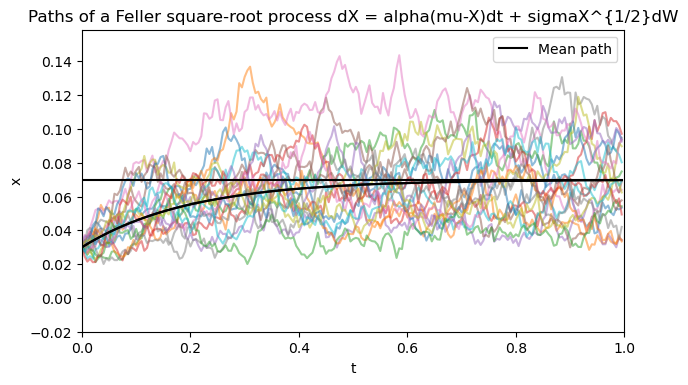

In [26]:
#!/usr/bin/python3
#Cox_Ingersoll_Ross_Model.ipynb
#Parth Parakh
#purpose: Simulate a Feller square-root process
#dX = alpha*(mu-X)*dt + sigma*sqrt(X)*dW
#Used in the Cox-Ingersoll-Ross model and in the Heston stochastic volatility model

#---------------------------------------------------------------------
#import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
#----------------------------------------------------------------------

#Defining the parameters
npaths = 20000;           #number of paths
T = 1;                   #time horizon
nsteps = 200;            #number of time steps
dt = T/nsteps;           #time step
t = np.arange(0,T,dt);   #observation times
alpha = 5; mu = 0.07; sigma = 0.265; #model parameters
X0 = 0.03;

X = np.zeros(npaths*nsteps);
X.resize(nsteps,npaths);
X[0,:] = 0.03;
N = np.random.normal(0,1,(nsteps,npaths));

# Compute and accumulate the increments
a = (sigma**2/alpha) * (np.exp(-alpha*dt)-np.exp(-2*alpha*dt)); #Euler-Maruyama with analytic moments
b = mu * (sigma**2/(2*alpha)) * (1-np.exp(-alpha*dt))**2;       #Euler-Maruyama with analytic moments

c = np.zeros(1*npaths);
c.resize(1,npaths);
for i in range(0,nsteps-1):
    X[i+1,:] = mu+(X[i,:]-mu)*np.exp(-alpha*dt) + np.sqrt(a*X[i,:]+b)*N[i,:];
    if np.any(X[i+1,:])<0:
        X[i+1,:] = 0;
    
EX = mu + (X0-mu)*np.exp(-alpha*t);

plot1 = plt.figure(1,figsize=(7,4), dpi=100)
for i in range(0,20):
    plt.plot(t,X[:,i],alpha=0.5)
plt.plot(t,EX,'black', label = 'Mean path')
plt.plot(t,np.mean(X,axis=1),'black');
plt.plot(t,mu*np.ones(len(t)),'black')
sdevinfty = sigma*np.sqrt(mu/(2*alpha));
plt.ylim(-0.02,mu+4*sdevinfty)
plt.xlim(0,1)
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Paths of a Feller square-root process dX = alpha(mu-X)dt + sigmaX^{1/2}dW')
plt.show()

#t2 = [0.05,0.1,0.2,0.4,1];
#x = np.linspace(-0.02,mu+4*sdevinfty,200);
#k = (sigma**2)*(1-np.exp(-alpha*t2))/(4*alpha);
#d = 4*alpha*mu/sigma**2;
#lambdaa = (4*alpha*X0)/((sigma**2)*(np.exp(alpha*t2)-1)); # non-centrality parameter
#f = np.zeros(len(x)*len(t2));
#f = np.resize(len(x),len(t2));
#for i in t2:
 #   f[:,i] = chi2(x/k[i],d,lambdaa[i])/k[i];
   